**ROSYIIDAH DHIYA'ULHAQ**

**19/446468/TK/49573**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png" "/content/"

cp: '/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png' and '/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png' are the same file


In [ ]:
import cv2
import matplotlib.pyplot as plt

**1. Muat citra dalam format Grayscale**



(202, 287)


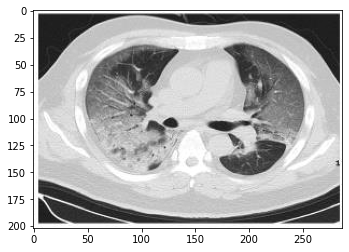

In [ ]:
image = cv2.imread("/content/COVID-19 Lung CT Scans_2020.02.10.20021584-p6-52%6.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = "gray")
print(image.shape) #memastikan citra adalah 1 channel
plt.show()

**2. Ubah citra ke RGB**

In [ ]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
img_r = img_rgb[:,:,0]
img_g = img_rgb[:,:,1]
img_b = img_rgb[:,:,2]

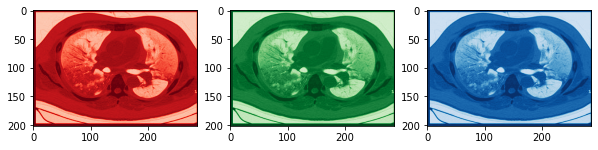

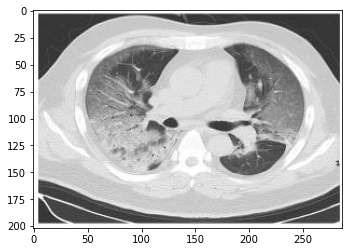

In [ ]:
f, axis = plt.subplots(1,3, figsize=[10, 30])
axis[0].imshow(img_r, cmap="Reds", vmin=0, vmax=255)
axis[1].imshow(img_g, cmap="Greens", vmin=0, vmax=255)
axis[2].imshow(img_b, cmap="Blues", vmin=0, vmax=255)
plt.figure()
plt.imshow(img_rgb)

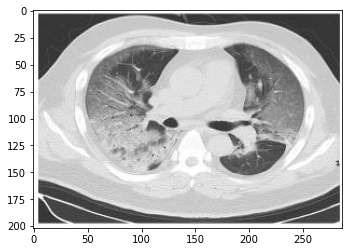

In [ ]:
#Ubah RGB ke BGR
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(img_bgr)

Dari hasil convert diatas, citra RGB dan BGR yang dihasilkan sama, hal tersebut dikarenakan gambar yang diolah adalah gray image
Gray image adalah kombinasi dari R-G-B, dengan perhitungan:
> Gray image = 0.29xR + 0.59xG + 0.11xB

RGB image sendiri memiliki 3komponen yang disebut komponen intensitas dengan 2 koordinat spasial, karena hal tersebutlah gray image tidak bisa mendapatkan RGB/BGR image dari Gray image


**3. Konversi citra ke color space lain**

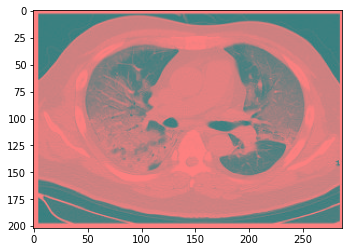

In [ ]:
#3 A
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
plt.figure()
plt.imshow(img_lab)

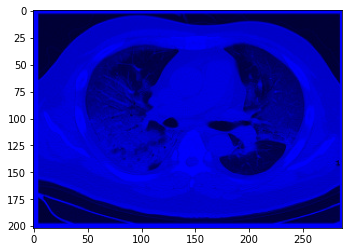

In [ ]:
#3 B
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.figure()
plt.imshow(img_hsv)

**4. Buatlah Histogram**

In [ ]:
rentang=1000-(-1000)
scale=255
#bone (+400 - +1000)
bone_a=round((1400/rentang)*scale)
print(bone_a)
bone_b=round((2000/rentang)*scale)
print(bone_b)
#soft tissue (+40 - +80)
stissue_a=round((1040/rentang)*scale)
print(stissue_a)
stissue_b=round((1080/rentang)*scale)
print(stissue_b)
#water (0)
water=round((1000/rentang)*scale)
print(water)
#fat (-60 - -100)
fat_a=round((900/rentang)*scale)
print(fat_a)
fat_b=round((940/rentang)*scale)
print(fat_b)
#lung (-400 - -600)
lung_a=round((400/rentang)*scale)
print(lung_a)
lung_b=round((600/rentang)*scale)
print(lung_b)
#air (-1000)
air=round((0/rentang)*scale)
print(air)

In [ ]:
import numpy as np

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title("Histogram Grayscale Image")
plt.xlabel("Percentage of component")
plt.ylabel("Pixel")

print("Percentage of Bone is {}".format((np.sum(hist[bone_a:bone_b])/np.sum(hist))*100))
print("Percentage of Soft Tissue is {}".format((np.sum(hist[stissue_a:stissue_b])/np.sum(hist))*100))
print("Percentage of Water is {}".format((np.sum(hist[water])/np.sum(hist))*100))
print("Percentage of Fat is {}".format((np.sum(hist[fat_a:fat_b])/np.sum(hist))*100))
print("Percentage of Lung is {}".format((np.sum(hist[lung_a:lung_b])/np.sum(hist))*100))
print("Percentage of Air is {}".format((np.sum(hist[air])/np.sum(hist))*100))

NameError: ignored